# Implementing Basket Analysis

In [1]:
import numpy as numpy
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

## Loading CSV Data

In [2]:
df = pd.read_csv("..\\data\\BreadBasket_DMS.csv")
df.head(10)


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


## Transform Data for Apriori Analysis
We need to create a basket format where each transaction contains the items purchased.

In [15]:
# Create a basket of items purchased per transaction
basket = (df.groupby(['Transaction', 'Item'])['Item']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction'))

# Convert quantities to binary (1 if purchased  else 0)
basket = basket.map(lambda x: 1 if x else 0)
basket = basket.astype(bool)
# Display the basket
basket

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Apply the Apriori Algorithm
Now we can apply the Apriori algorithm to find frequent itemsets.

In [28]:
# Apply Apriori algorithm with a minimum support threshold
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Display frequent itemsets
frequent_itemsets

,support,itemsets
0,0.036093,(Alfajores)
1,0.015948,(Baguette)
2,0.324940,(Bread)
3,0.039765,(Brownie)
4,0.103137,(Cake)
...,...,...
58,0.049523,"(Tea, Coffee)"
59,0.023502,"(Coffee, Toast)"
60,0.018256,"(Tea, NONE)"
61,0.014269,"(Tea, Sandwich)"


## Generate Association Rules
Next, we will generate association rules from the frequent itemsets.

In [29]:
# Generate association rules with a minimum confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the generated rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Alfajores),(Coffee),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861,0.125899
1,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667,0.109767
2,(Cookies),(Coffee),0.054034,0.475081,0.028014,0.518447,1.091280,0.002343,1.090053,0.088422
3,(Hot chocolate),(Coffee),0.057916,0.475081,0.029378,0.507246,1.067704,0.001863,1.065276,0.067309
4,(Juice),(Coffee),0.038296,0.475081,0.020460,0.534247,1.124537,0.002266,1.127031,0.115155
5,(Medialuna),(Coffee),0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561,0.176213
6,(NONE),(Coffee),0.079005,0.475081,0.042073,0.532537,1.120938,0.004539,1.122908,0.117145
7,(Pastry),(Coffee),0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079,0.152626
8,(Sandwich),(Coffee),0.071346,0.475081,0.037981,0.532353,1.120551,0.004086,1.122468,0.115847
9,(Scone),(Coffee),0.034309,0.475081,0.017941,0.522936,1.100729,0.001642,1.100310,0.094762


## Visualize Results 
 visualize some of the results to better understand the associations.

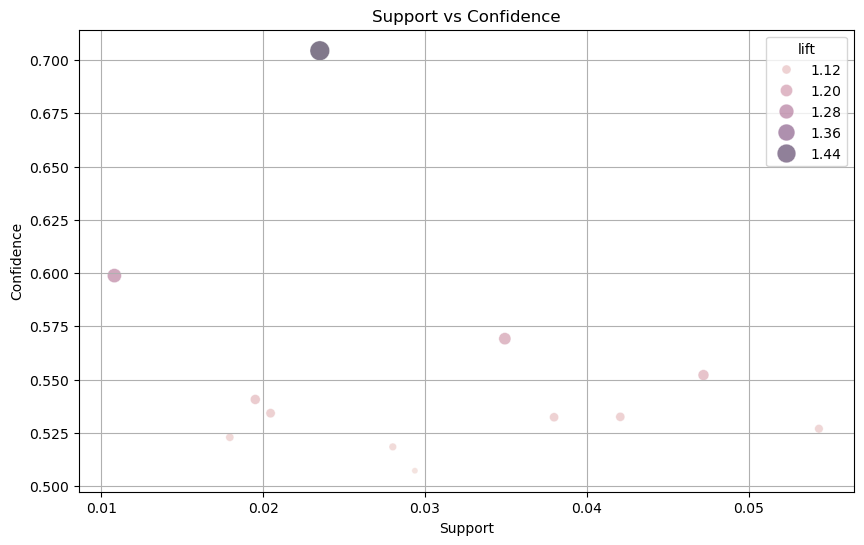

In [31]:

# Visualizing support vs confidence
plt.figure(figsize=(10,6))
sns.scatterplot(data=rules, x='support', y='confidence', hue='lift', size='lift', sizes=(20,200), alpha=0.6,)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()

## Conclusion
1.transformed your transaction data into a suitable format for market basket analysis.
2.applied the Apriori algorithm to identify frequent itemsets.
3.generated association rules that show how different product categories are related based on customer purchases.
4.The support metric defined the frequency of the particular combination of two or more product by transactions
5.The confidence metric implies that the probability for the transaction occur based on support values
6.The higher the support and confidence value the higher the probability for customer purchased the combination of particular product